In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [2]:
# open a database connection
conn = sqlite3.connect("m4_survey_data.sqlite")

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
#Run a group by query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [7]:
#describe a table
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

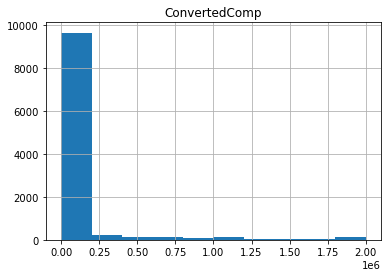

In [8]:
#Visualizing distribution of data
#Plot a histogram of ConvertedComp
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')

<AxesSubplot:>

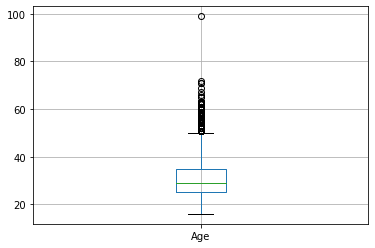

In [9]:
#Plot a box plot of Age
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')

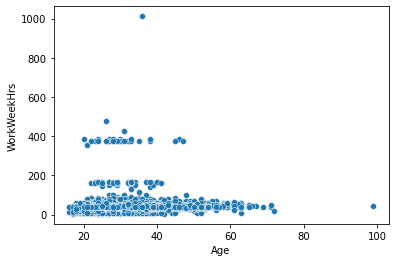

In [10]:
#Visualizing relationships in data
#Creating a scatter plot of Age and WorkWeekHrs.
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)

plot = sns.scatterplot(x='Age', y='WorkWeekHrs', data=df)


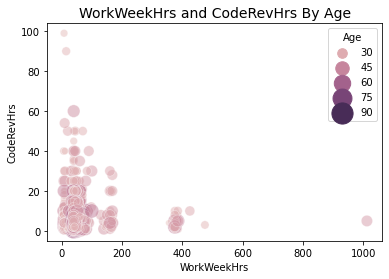

In [11]:
#Creating a bubble plot of WorkWeekHrs and CodeRevHrs
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df1, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500)) 

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

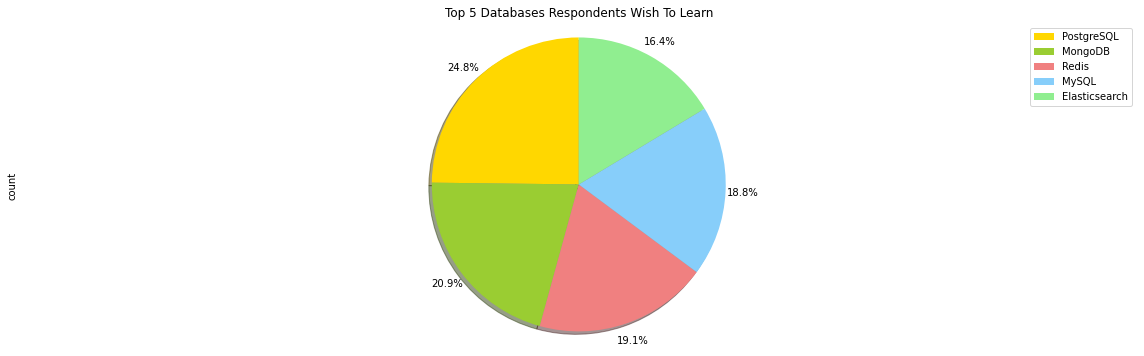

In [12]:
#Visualizing composition of data
#Creating a pie chart of the top 5 databases that respondents wish to learn next year
QUERY = """ 
SELECT DatabaseDesireNextYear, COUNT(*) as count 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DatabaseDesireNextYear', inplace=True) 

colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)  

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn') 
plt.axis('equal')
plt.show()

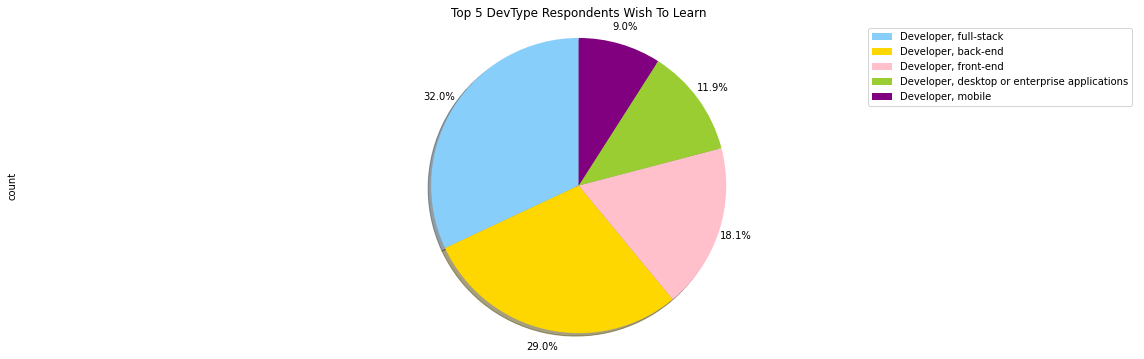

In [13]:
#Creating a pie chart of the top 5 DevType that respondents wish to learn next year
QUERY = """ 
SELECT DevType, COUNT(*) as count 
from DevType 
group by DevType 
order by count(DevType) DESC LIMIT 5 
""" 

df=pd.read_sql_query(QUERY,conn)  
df.set_index('DevType', inplace=True) 


colors_list=['lightskyblue','gold', 'pink','yellowgreen', 'purple','lightcoral',  'lightgreen']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)  

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 DevType Respondents Wish To Learn') 
plt.axis('equal')
plt.show()

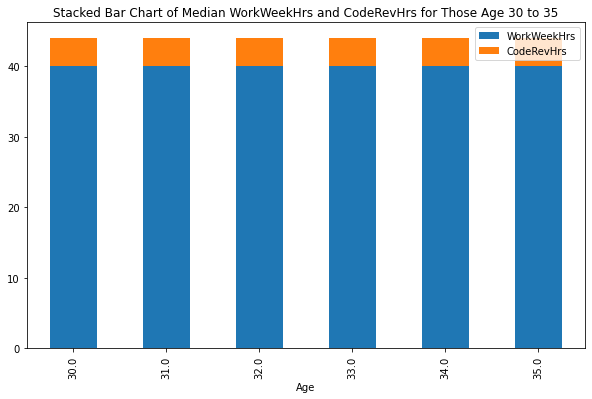

In [14]:
#Creating a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()


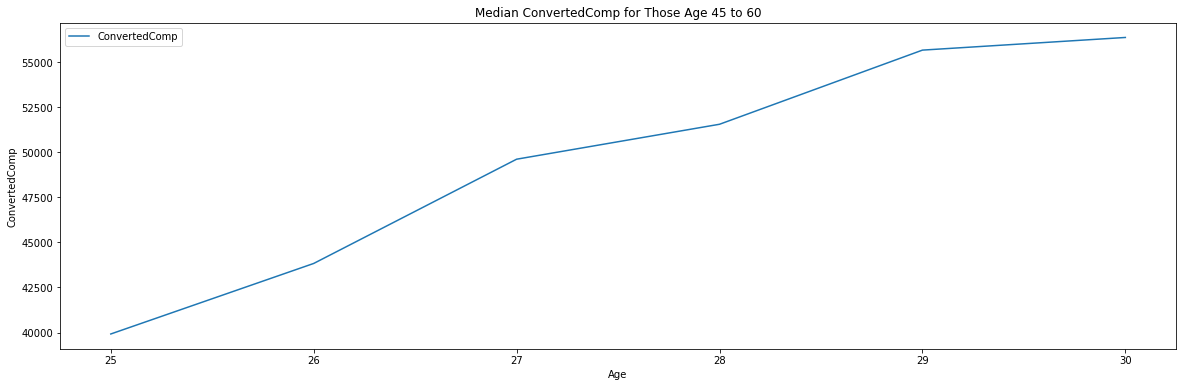

In [15]:
#Visualizing comparison of data
#Plotting the median ConvertedComp for all ages from 45 to 60
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 25 AND 30
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(20, 6))

plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

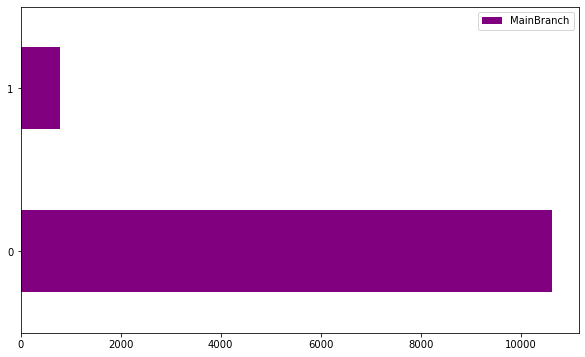

In [16]:
#Creating a horizontal bar chart using column MainBranch
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='purple')

plt.show()